In [580]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [581]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-Data301022.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
cycleZ = pd.read_csv("Data/Chickens data/CycleZ-Data101122.csv", sep=";")
temperature_data = pd.read_csv("Data/Meteorological data/temperature_goito.csv", sep=",")
rain_data = pd.read_csv("Data/Meteorological data/rain_goito.csv", sep=",")
humidity_data = pd.read_csv("Data/Meteorological data/humidity_ponte_sul_mincio.csv", sep=",")

## Data cleaning

In [582]:
# removing rows with Nan values from chickens data
cycleA = cycleA.dropna()
cycleB = cycleB.dropna()
# cycleZ = cycleZ.dropna()

# removing rows with non valid data from temperature_data
temperature_data = temperature_data[temperature_data["Avg_temp_value"] != -999.0]
#removing sensor id column
temperature_data.pop('Sensor_ID')
temperature_data.pop('Min_temp_value')
temperature_data.pop('Max_temp_value')

# removing rows with non valid data from humidity_data
humidity_data = humidity_data[humidity_data["Avg_humidity_value"] != -999.0]
#removing sensor id column
humidity_data.pop('Sensor_ID')
humidity_data.pop('Min_humidity_value')
humidity_data.pop('Max_humidity_value')


# removing "%" value from chickens data
cycleA["% laied"] = cycleA["% laied"].str.rstrip("%").astype(float)
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)
cycleZ["% laied"] = cycleZ["% laied"].str.rstrip("%").astype(float)

# modifying data format of chickens data for uniformity: YYYY/MM/DD
cycleA['Arrival Chickens Date'] = pd.to_datetime(cycleA["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Laid'] = pd.to_datetime(cycleA["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Selling'] = pd.to_datetime(cycleA["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Arrival Chickens Date'] = pd.to_datetime(cycleZ["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Laid'] = pd.to_datetime(cycleZ["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Selling'] = pd.to_datetime(cycleZ["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')

## Data preview

### Cycle A

In [583]:
cycleA.head()

Arrival Chickens Date  Chickens Death Per Day  Current Chickens  \
11            2018/07/19                     4.0           42123.0   
16            2018/07/19                    12.0           42071.0   
20            2018/07/19                     6.0           42049.0   
23            2018/07/19                     7.0           42031.0   
24            2018/07/19                     6.0           42025.0   

   Date of Laid  # of Eggs  % laied  Water Consumption (gr)  \
11   2018/08/18          0     0.00                    86.5   
16   2018/08/23      21660    51.48                    89.5   
20   2018/08/27      26370    62.71                    94.0   
23   2018/08/30      26270    62.50                   100.0   
24   2018/08/31      25920    61.68                   101.5   

    Feed Consumption (gr) Date of Selling  # Eggs sold (First quality)  \
11                   71.5      2018/08/18                        43200   
16                   74.5      2018/08/23                        43200   
20                   87.5      2018/08/27                        97680   
23                   87.0      2018/08/30                        79710   
24                   89.5      2018/08/31                        25050   

    # Eggs sold (Second quality)  
11                             0  
16                             0  
20                             0  
23                             0  
24                             0

### Cycle B

In [584]:
cycleB.head()

Arrival Chickens Date  Chickens Death Per Day  Current Chickens  \
0             2020/08/09                     1.0           42215.0   
6             2020/08/09                     3.0           42209.0   
12            2020/08/09                     8.0           42196.0   
13            2020/08/09                     6.0           42190.0   
14            2020/08/09                     2.0           42188.0   

   Date of Laid  # of Eggs  % laied  Water Consumption (gr)  \
0    2020/09/04     1470.0     3.48                   110.0   
6    2020/09/10        0.0     0.00                   106.0   
12   2020/09/16    23670.0    56.10                   117.0   
13   2020/09/17    25920.0    61.44                   118.0   
14   2020/09/18    27450.0    65.07                   113.0   

    Feed Consumption (gr) Date of Selling  # Eggs sold (First quality)  \
0                    81.0      2020/09/04                       1470.0   
6                    83.0      2020/09/10                      31140.0   
12                   90.0      2020/09/16                     120420.0   
13                   99.0      2020/09/17                      25050.0   
14                   94.0      2020/09/18                      26610.0   

    # Eggs sold (Second quality)  
0                            0.0  
6                            0.0  
12                           0.0  
13                           0.0  
14                           0.0

### Cycle Z

In [585]:
cycleZ.head()

Arrival Chickens Date  Chickens Death Per Day  Current Chickens  \
0            2016/11/17                     NaN             42230   
1            2016/11/17                     NaN             42230   
2            2016/11/17                     NaN             42230   
3            2016/11/17                     NaN             42230   
4            2016/11/17                    41.0             42210   

  Date of Laid  # of Eggs  % laied  Water Consumption (gr)  \
0   2016/12/23     3300.0     7.81                     NaN   
1   2016/12/24        NaN      NaN                     NaN   
2   2016/12/25     4170.0     9.87                     NaN   
3   2016/12/26        NaN      NaN                     NaN   
4   2016/12/27        NaN      NaN                     NaN   

   Feed Consumption (gr) Date of Selling  # Eggs sold (First quality)  \
0                    NaN             NaN                            0   
1                    NaN             NaN                            0   
2                    NaN             NaN                            0   
3                    NaN             NaN                            0   
4                    NaN             NaN                            0   

   # Eggs sold (Second quality)  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

### Temperature data

In [586]:
temperature_data.head()

Date  Avg_temp_value
0  2014/01/01             2.8
1  2014/01/02             4.1
2  2014/01/03             4.7
3  2014/01/04             6.0
4  2014/01/05             6.8

### Humidity data

In [587]:
humidity_data.head()

Date  Avg_humidity_value
0  2014/01/01                70.5
1  2014/01/02                85.9
2  2014/01/03                99.9
3  2014/01/04                99.9
4  2014/01/05                99.9

## Data join: chicken's data with meteorological data

In [588]:
meteorological_data = pd.merge(temperature_data, humidity_data, on='Date')

weather_join_chickens_a = pd.merge(cycleA, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

weather_join_chickens_b = pd.merge(cycleB, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

weather_join_chickens_z = pd.merge(cycleZ, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

In [589]:
# Function that takes in input a pandas df with dates and returns a pandas df of seasons
def date_to_season (dates_dataframe):
    
    dateOffset = ( pd.to_datetime(dates_dataframe).dt.month*100 + pd.to_datetime(dates_dataframe).dt.day - 320 ) % 1300

    seasons = pd.cut(dateOffset, [0, 300, 602, 900, 1300], labels=['spring', 'summer', 'autumn', 'winter'])
    
    return seasons

weather_join_chickens_a['Season'] = date_to_season(weather_join_chickens_a['Date'])
weather_join_chickens_b['Season'] = date_to_season(weather_join_chickens_b['Date'])
weather_join_chickens_z['Season'] = date_to_season(weather_join_chickens_z['Date'])

## Data normalization

In [590]:
# Apply min-max normalization techniques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in weather_join_chickens_a:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_a[column] = scaler.fit_transform(weather_join_chickens_a[column].values.reshape(-1, 1))        
for column in weather_join_chickens_b:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_b[column] = scaler.fit_transform(weather_join_chickens_b[column].values.reshape(-1, 1))
for column in weather_join_chickens_z:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date" and column!="Season"):
        weather_join_chickens_z[column] = scaler.fit_transform(weather_join_chickens_z[column].values.reshape(-1, 1))

C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\fcami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis

## Data inspection

### Choosing features

In [591]:
# input (x) and output (y) features
every_feature = weather_join_chickens_a.columns
no_dates_fetures = [        'Chickens Death Per Day', 'Current Chickens','# of Eggs', '% laied', 'Water Consumption (gr)',
                            'Feed Consumption (gr)',
                            '# Eggs sold (First quality)', '# Eggs sold (Second quality)',
                            'Avg_temp_value', 'Min_temp_value', 'Max_temp_value',
                            'Avg_humidity_value', 'Min_humidity_value', 'Max_humidity_value']
input_features = ['Water Consumption (gr)', 'Feed Consumption (gr)', 'Avg_temp_value', 'Avg_humidity_value', 'Season']
output_features = ['Chickens Death Per Day','# of Eggs']

### Cycle A

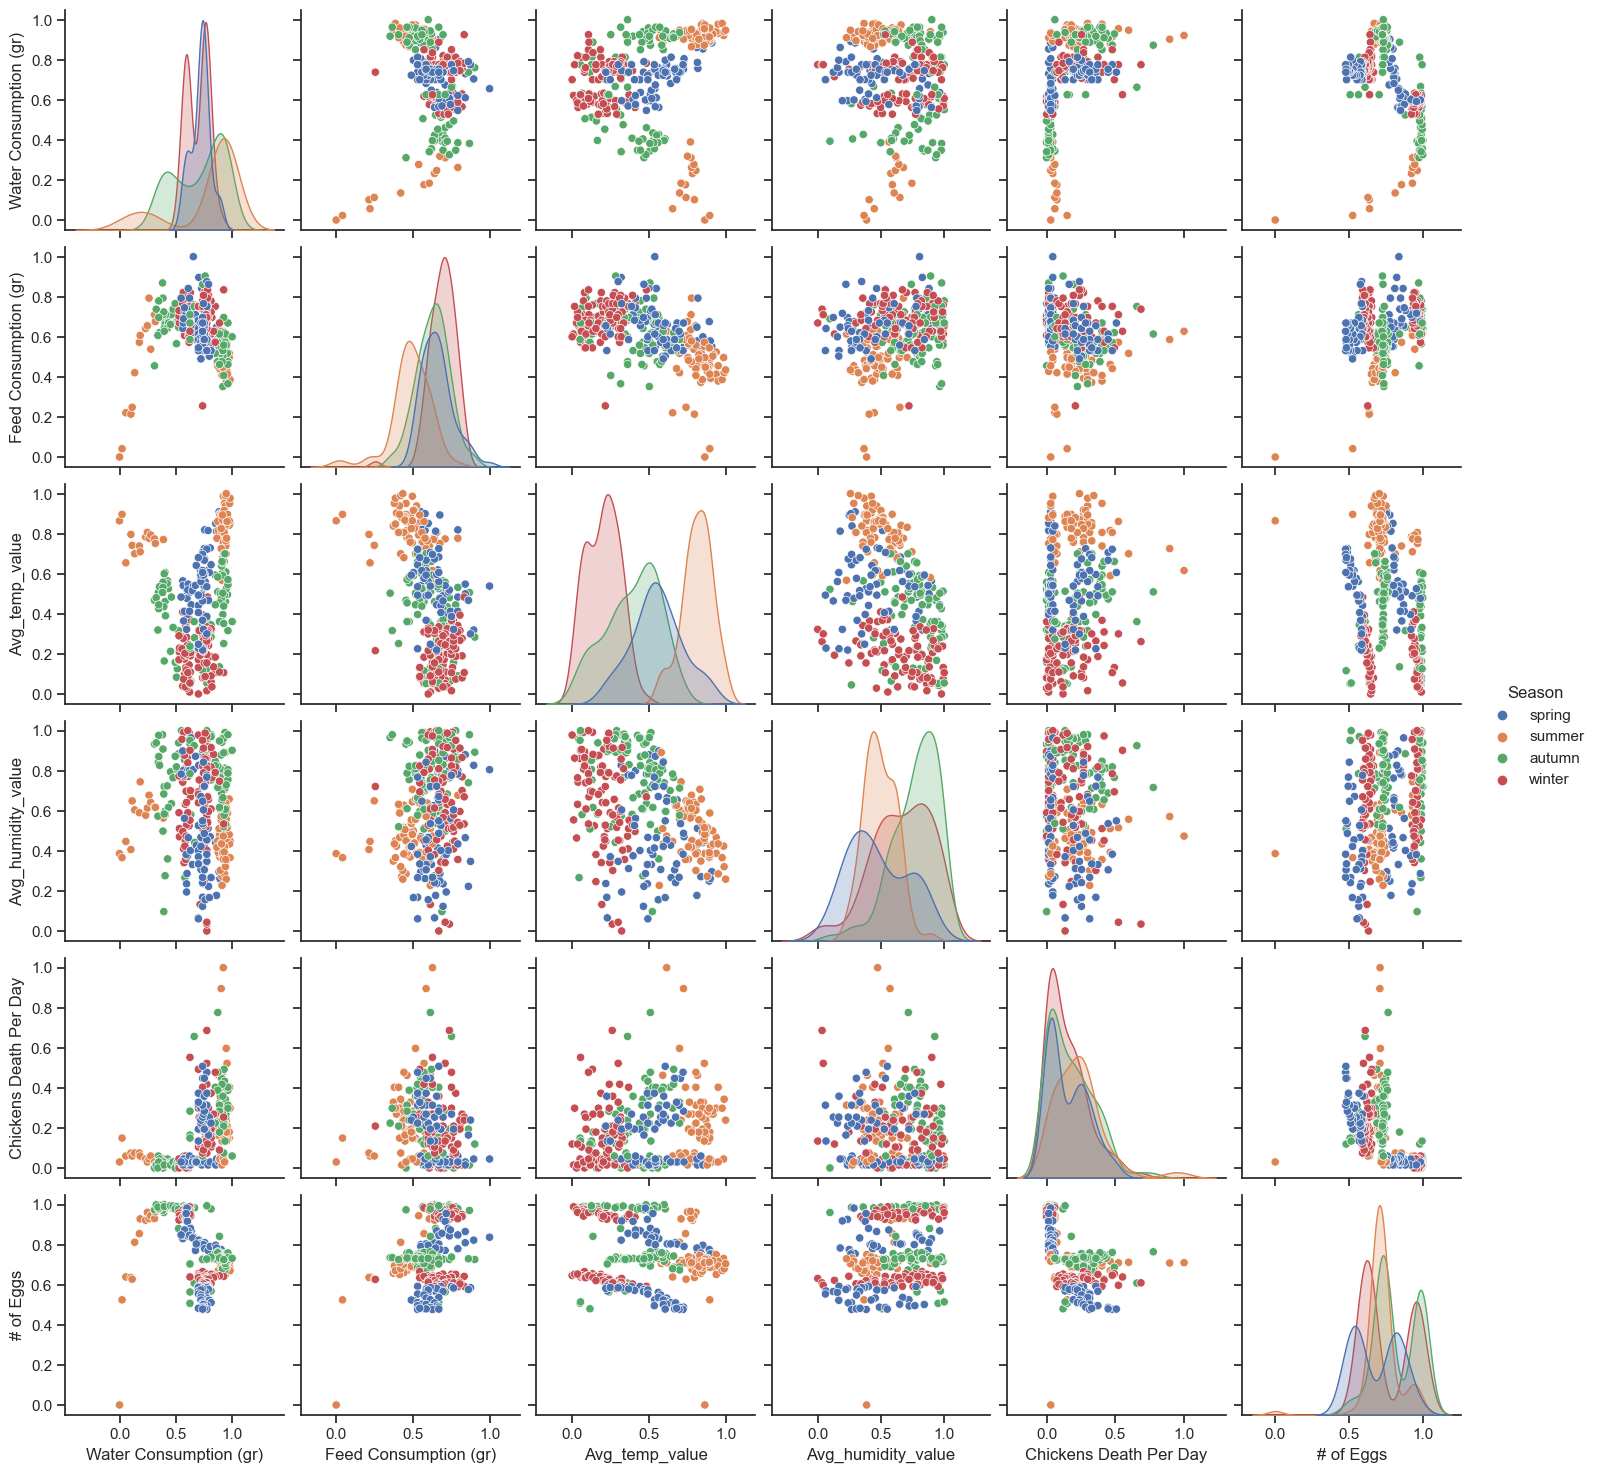

C:\Users\fcami\AppData\Local\Temp\ipykernel_6448\3971686682.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_a[input_features + output_features].corr(), annot=True)


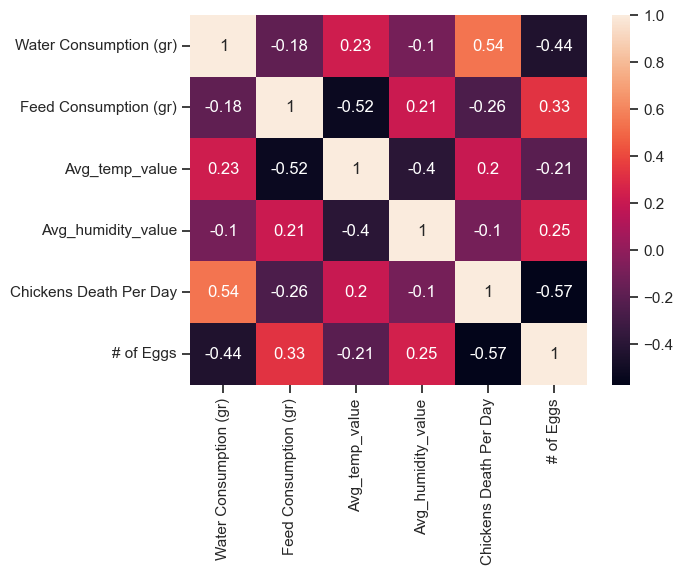

In [592]:
# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_a[input_features + output_features], hue='Season')
plt.show()

# heatmap cycle A
sns.heatmap(weather_join_chickens_a[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle B

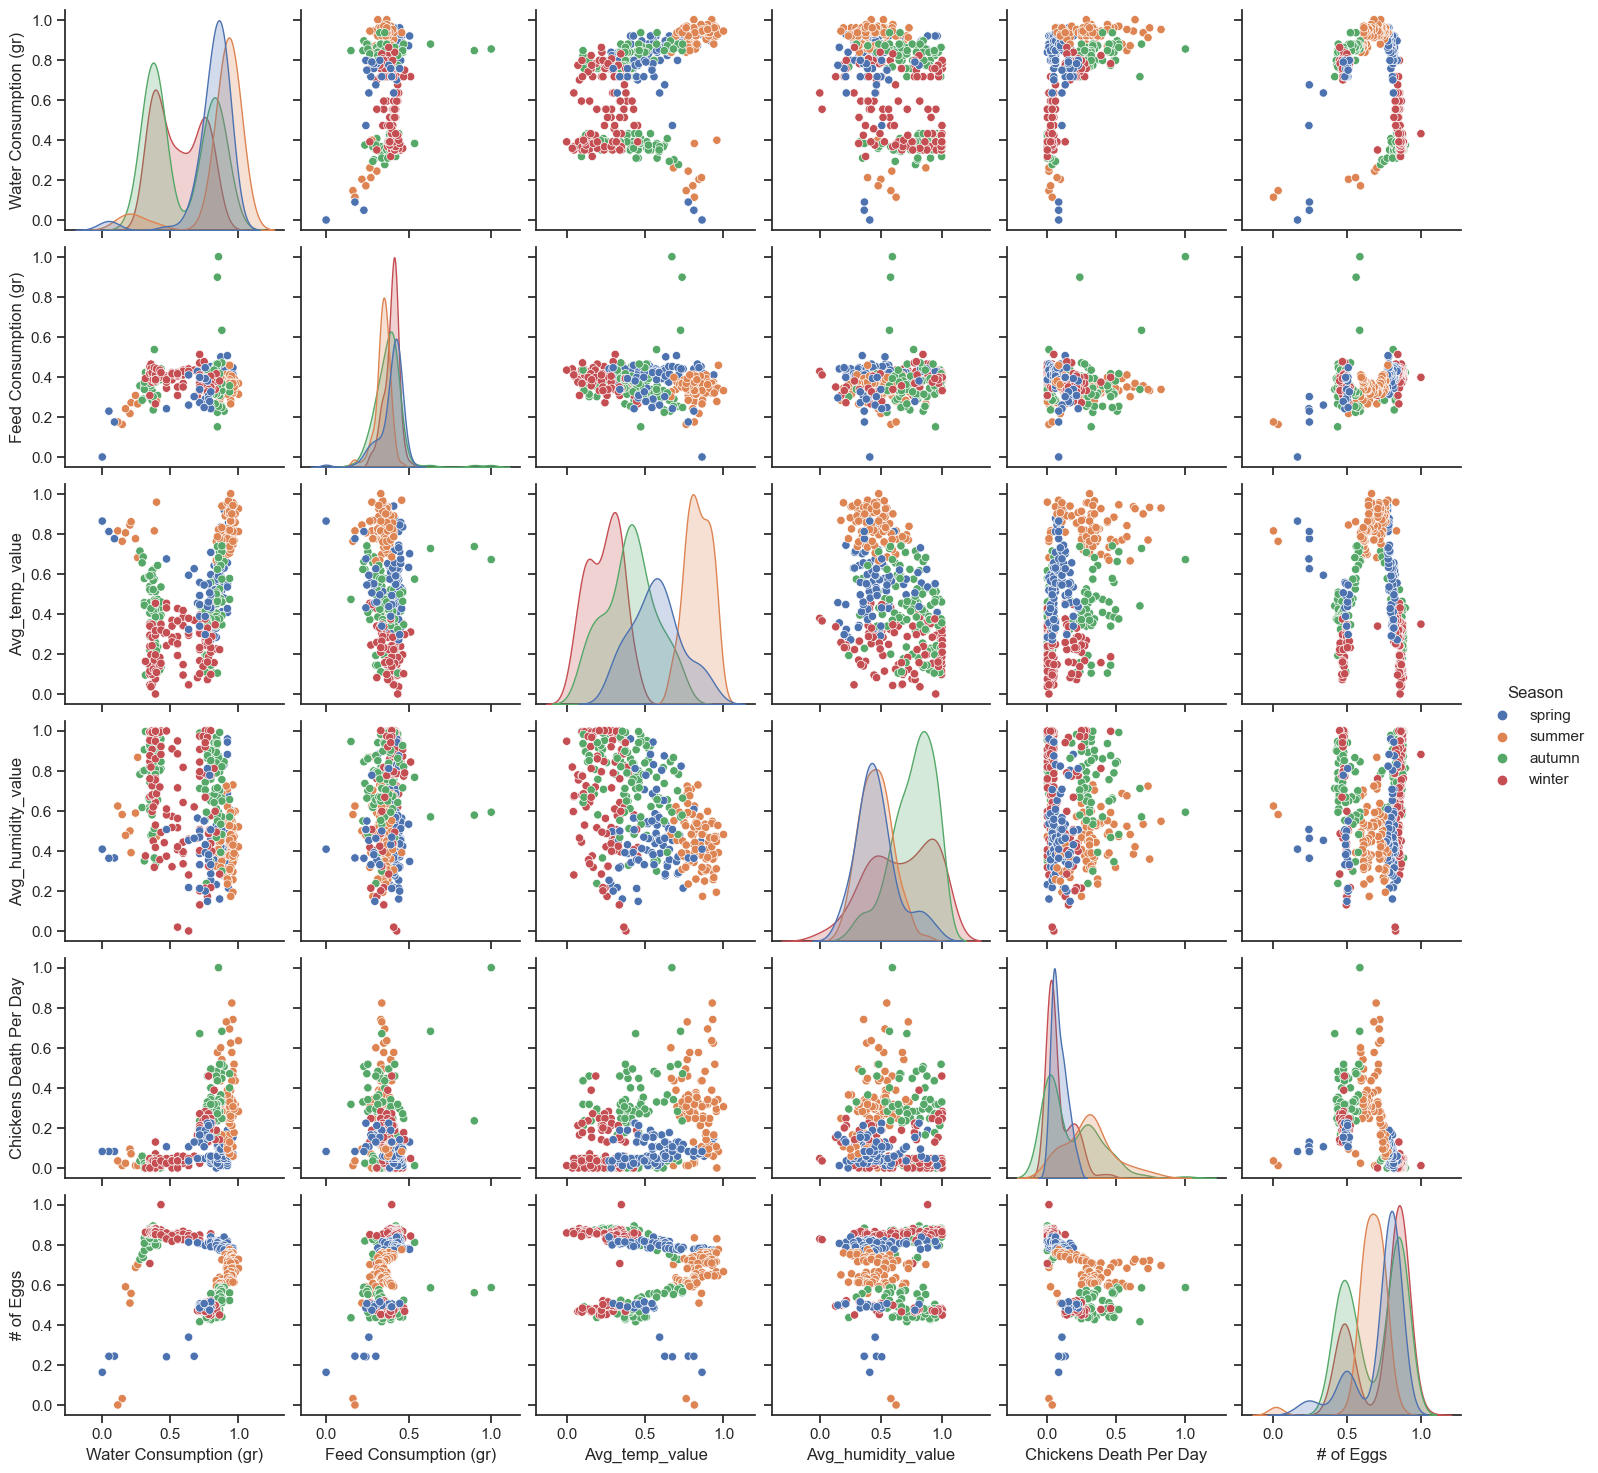

C:\Users\fcami\AppData\Local\Temp\ipykernel_6448\1139925268.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_b[input_features + output_features].corr(), annot=True)


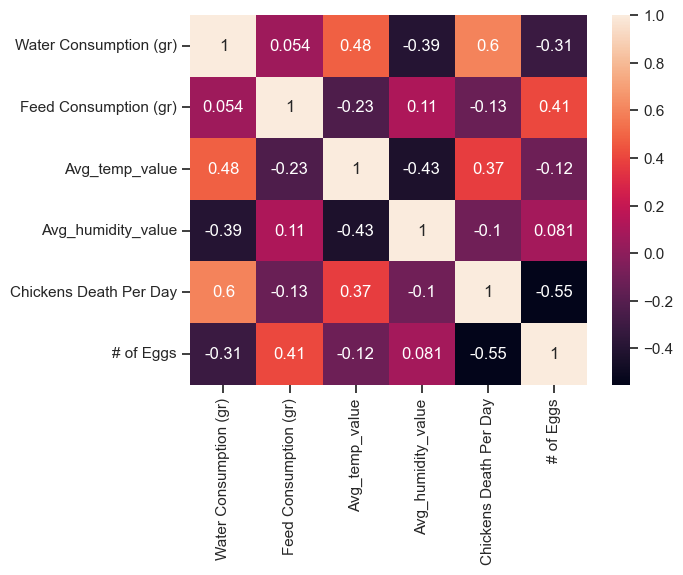

In [593]:
# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_b[input_features + output_features], hue='Season')
plt.show()

# heatmap cycle B
sns.heatmap(weather_join_chickens_b[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle Z

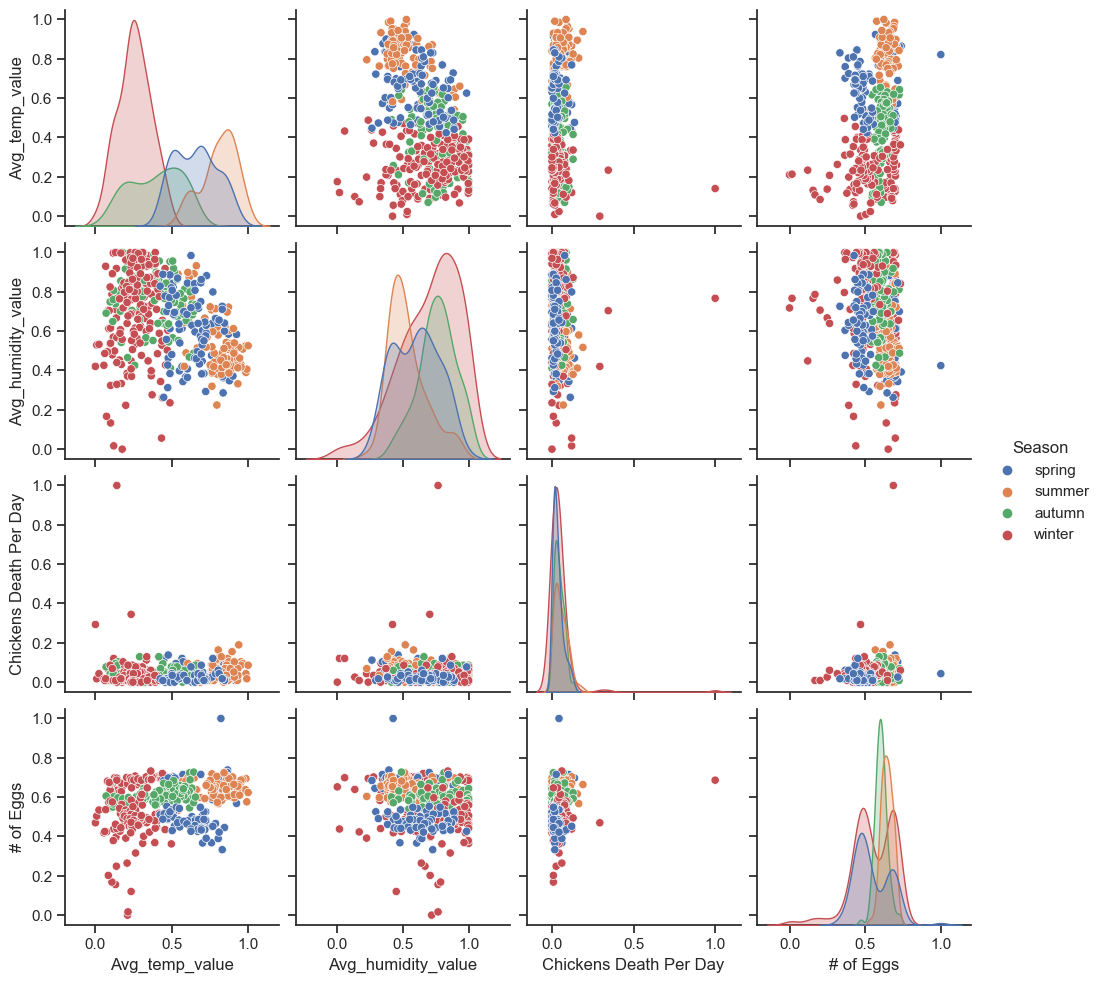

C:\Users\fcami\AppData\Local\Temp\ipykernel_6448\606239845.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_join_chickens_z[input_features_z + output_features].corr(), annot=True)


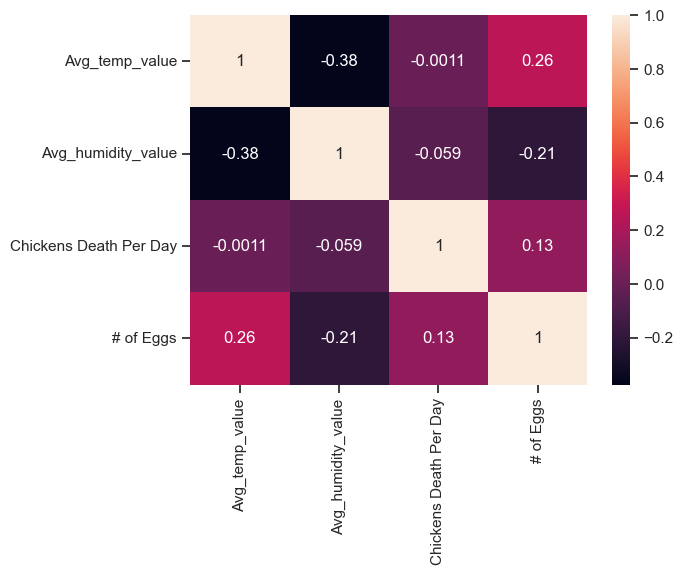

In [594]:
input_features_z = ['Avg_temp_value', 'Avg_humidity_value', 'Season']

# pair plot cycle Z
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_z[input_features_z + output_features], hue='Season')
plt.show()

# heatmap cycle Z
sns.heatmap(weather_join_chickens_z[input_features_z + output_features].corr(), annot=True)
plt.show()

# Cycle unification

In [595]:
def add_cycle_ID_column(df: pd.DataFrame, cycle_name: str):
    df['Cycle_ID'] = cycle_name
    return df

a = add_cycle_ID_column(weather_join_chickens_a, 'a')
b = add_cycle_ID_column(weather_join_chickens_b, 'b')

a_b = pd.concat([a, b], axis=0)

a_b

Arrival Chickens Date  Chickens Death Per Day  Current Chickens  \
0              2018/07/19                0.029851          1.000000   
1              2018/07/19                0.149254          0.993503   
2              2018/07/19                0.059701          0.990755   
3              2018/07/19                0.074627          0.988506   
4              2018/07/19                0.059701          0.987756   
..                    ...                     ...               ...   
409            2020/08/09                0.129412          0.000328   
410            2020/08/09                0.105882          0.000180   
411            2020/08/09                0.082353          0.000131   
412            2020/08/09                0.082353          0.000079   
413            2020/08/09                0.082353          0.000000   

    Date of Laid  # of Eggs   % laied  Water Consumption (gr)  \
0     2018/08/18   0.000000  0.000000                0.000000   
1     2018/08/23   0.524836  0.470266                0.022472   
2     2018/08/27   0.638963  0.572851                0.056180   
3     2018/08/30   0.636540  0.570933                0.101124   
4     2018/08/31   0.628059  0.563442                0.112360   
..           ...        ...       ...                     ...   
409   2022/05/04   0.243069  0.300442                0.674797   
410   2022/05/09   0.240490  0.297648                0.471545   
411   2022/05/11   0.243714  0.301793                0.089431   
412   2022/05/13   0.243069  0.301162                0.048780   
413   2022/05/16   0.163121  0.202217                0.000000   

     Feed Consumption (gr) Date of Selling  # Eggs sold (First quality)  \
0                 0.000000      2018/08/18                     0.269828   
1                 0.041379      2018/08/23                     0.269828   
2                 0.220690      2018/08/27                     0.782388   
3                 0.213793      2018/08/30                     0.613322   
4                 0.248276      2018/08/31                     0.099069   
..                     ...             ...                          ...   
409               0.301205      2022/05/04                     0.185725   
410               0.240964      2022/05/09                     0.452626   
411               0.174699      2022/05/11                     0.173662   
412               0.228916      2022/05/13                     0.176175   
413               0.000000      2022/05/16                     0.232470   

     # Eggs sold (Second quality)        Date  Avg_temp_value  \
0                        0.000000  2018/08/18        0.864516   
1                        0.000000  2018/08/23        0.896774   
2                        0.000000  2018/08/27        0.654839   
3                        0.000000  2018/08/30        0.796774   
4                        0.000000  2018/08/31        0.741935   
..                            ...         ...             ...   
409                      0.333333  2022/05/04        0.625407   
410                      0.000000  2022/05/09        0.674267   
411                      0.000000  2022/05/11        0.775244   
412                      0.000000  2022/05/13        0.811075   
413                      0.000000  2022/05/16        0.863192   

     Avg_humidity_value  Season Cycle_ID  
0              0.386293  summer        a  
1              0.366044  summer        a  
2              0.447040  summer        a  
3              0.406542  summer        a  
4              0.649533  summer        a  
..                  ...     ...      ...  
409            0.462665  spring        b  
410            0.506589  spring        b  
411            0.364568  spring        b  
412            0.363104  spring        b  
413            0.408492  spring        b  

[742 rows x 16 columns]

## Cycle unification pairplot

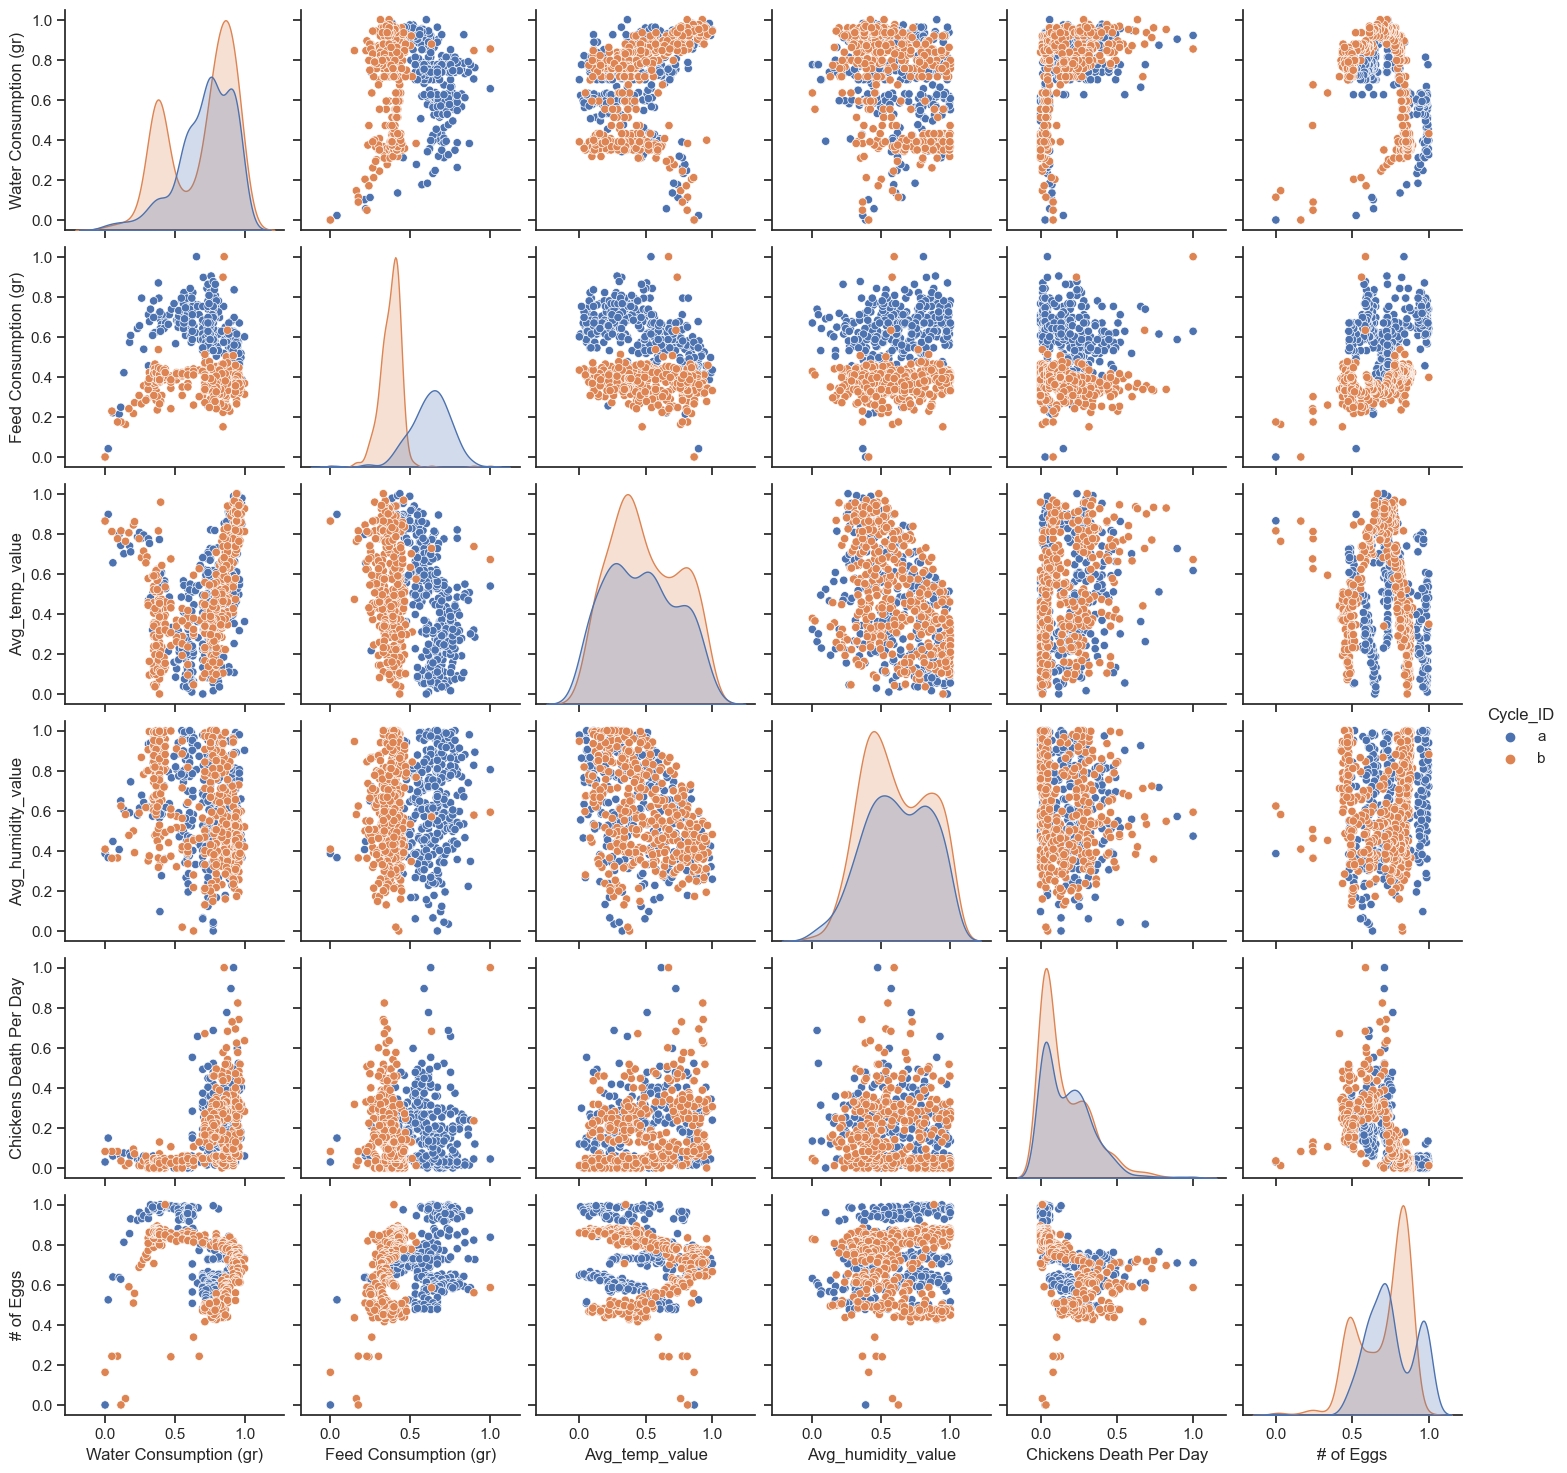

In [597]:
# pair plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(a_b[input_features + output_features + ['Cycle_ID']], hue='Cycle_ID')
plt.show()

# Clustering

ValueError: could not convert string to float: 'summer'

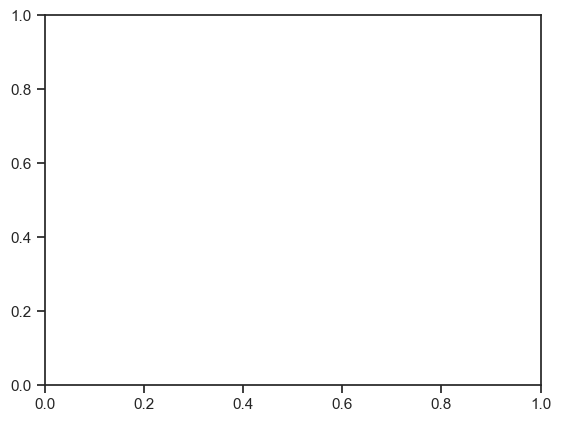

In [600]:
from sklearn.cluster import KMeans

toCluster = ["Season", "Cycle_ID", "Chickens Death Per Day"]

ax=plt.subplot()

# Fit Kmeans for each dataset
model = KMeans(n_clusters=4)                                # 2- hyperparams
model.fit(a_b[toCluster])                                   # 3- model fitting (unsupervised, y is not required)
y_predict = model.predict(a_b[toCluster])                   # 4- model testing

# And show the resulting clusters
sns.scatterplot(x=a_b[toCluster].iloc[:, 0], y=a_b[toCluster].iloc[:, 1], hue=y_predict, ax=ax)